## Observations and Insights

Ramicane and Capomulin are the two top most progressive development on the reduction of tumor volume over time.  These two 
has the most number of datapoints.  This could lead to a conclusion that for other drug regimens, life of the mice are shorter.  Looking at the statistics as a whole these two has the least variance, STD, SEM as well. 

The sex of the mice, male or female, could not contribute to the conclusion as the distribution are always equal to 50%.

Looking at the comparison of the weight and the average tumor volume, you can conclude that the weight is directly proportional to average size of the tumor volume.

In this exercise, it could also useful if there are data gathered on how many mice were used for each drug regimen.

## Dependencies and starter code

In [1]:
%matplotlib notebook

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata, on = 'Mouse ID')

#Cleaning up the table for data header readability
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume","Drug Regimen":"Drug","Weight (g)":"Weight"})
merged_df.to_csv("data/merged_df.csv")
merged_df.head(30)

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug,Sex,Age_months,Weight
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


## Summary statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using groupby "Drug Regimen" and calculating the reqs
regimen=merged_df.groupby(["Drug"])["Tumor Volume"].agg(['mean', 'median', 'var', 'std', 'sem', 'count'])

#Label and Format the columns with two decimal place format
regimen.columns=['Mean','Median', 'Variance','STD','SEM','Data Pts']
decimals =['Mean','Median', 'Variance','STD','SEM']
regimen[decimals]=regimen[decimals].applymap(lambda x:'{:.2f}'.format(x))
regimen.to_csv("data/regimen.csv")
regimen.head(20)

,Mean,Median,Variance,STD,SEM,Data Pts
Drug,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,230
Ceftamin,52.59,51.78,39.29,6.27,0.47,178
Infubinol,52.88,51.82,43.13,6.57,0.49,178
Ketapril,55.24,53.70,68.55,8.28,0.60,188
Naftisol,54.33,52.51,66.17,8.13,0.60,186
Placebo,54.03,52.29,61.17,7.82,0.58,181
Propriva,52.32,50.85,42.35,6.51,0.51,161
Ramicane,40.22,40.67,23.49,4.85,0.32,228
Stelasyn,54.23,52.43,59.45,7.71,0.57,181


## Bar plots

In [40]:
# Generate a bar plot showing number of data points for each treatment regimen using Pandas
# Filter the DataFrame down only to those columns to chart
drug_data = regimen[["Data Pts"]]
drug_data.to_csv("drug_data.csv")
drug_data.head(10)

,Data Pts
Drug,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


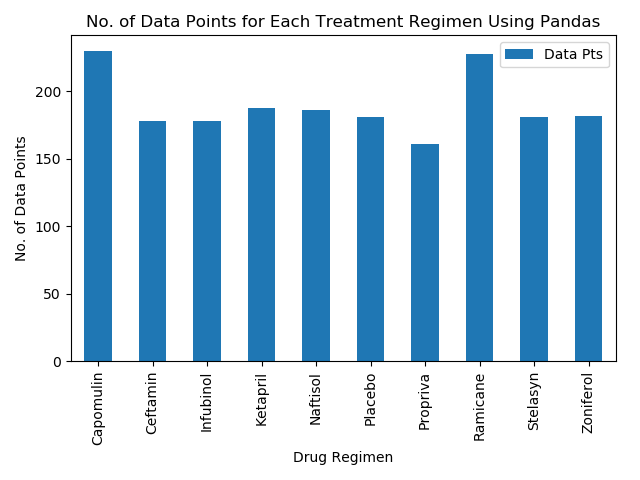

In [5]:
# Chart the data, give it a title, and label the axes
panda_bar = drug_data.plot(kind="bar", title="No. of Data Points for Each Treatment Regimen Using Pandas")
panda_bar.set_xlabel('Drug Regimen')
panda_bar.set_ylabel("No. of Data Points")

plt.show()
plt.tight_layout()
plt.savefig("../Images/drug_data_pd.png")

In [6]:
# Filter the DataFrame down only to those columns to chart
drug_data = regimen[["Data Pts"]]

drug_data.head(100)

,Data Pts
Drug,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

<IPython.core.display.Javascript object>


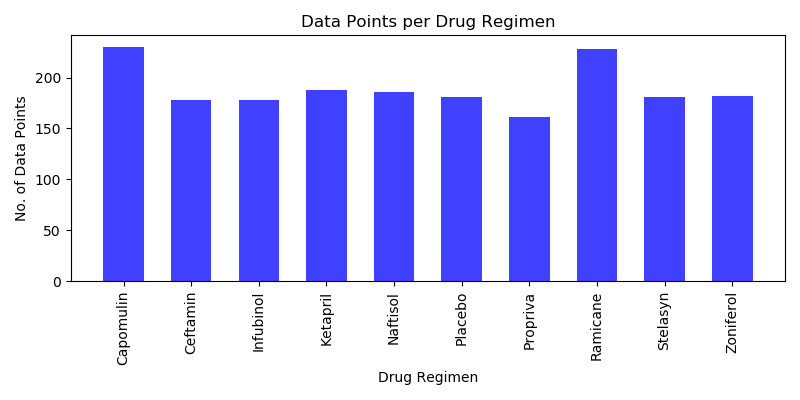

In [9]:
# Set x axis and tick locations
x_axis = np.arange(len(drug_data))
tick_locations = [value for value in x_axis]
label=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,4))
plt.bar(x_axis, drug_data["Data Pts"], color='b', alpha=0.75, width=0.6, align="center")
plt.xticks(tick_locations, label , rotation="vertical")

# Set a Title and labels
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Data Points")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/drug_data_plt.png")
plt.show()

## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [41]:
#Using groupby "Sex" and filtering the duplicates by using the Mouse ID
mice_plt=merged_df.groupby(['Sex'])["Mouse ID"].agg(['count'])
mice_plt.to_csv("data/mice_plt.csv")
mice_plt.head()


,count
Sex,
Female,935
Male,958


<IPython.core.display.Javascript object>


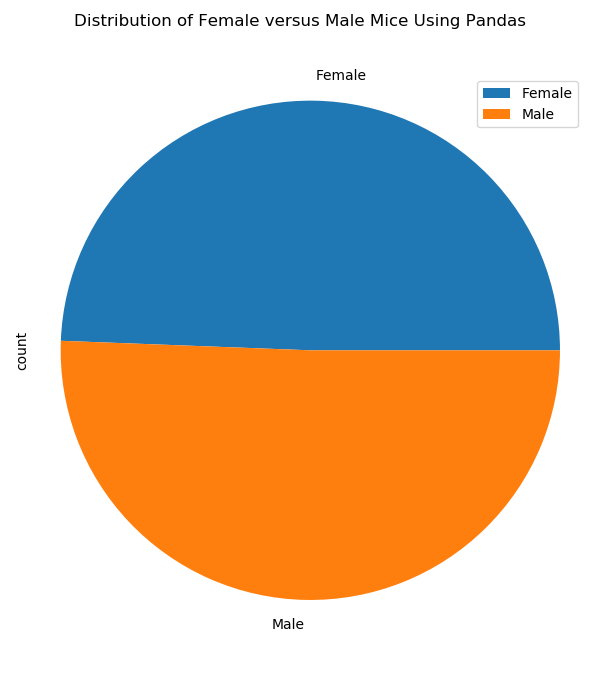

In [12]:
plot = mice_plt.plot.pie(subplots=True, figsize=(6, 7), title="Distribution of Female versus Male Mice Using Pandas")
plt.show()
plt.tight_layout()
plt.axis('image')
plt.savefig("../Images/mice_pie.png")

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [42]:
# Creating a pivot table to summarize data so to verify what are the four most promising treatment regimens based on the final volume at the last time point
# Here we can see the average tumor volume per time point for each drug
tumor_response = pd.pivot_table(merged_df, index=["Timepoint"], values="Tumor Volume", columns=["Drug"], aggfunc=np.mean)
tumor_response.to_csv("data/tumor_response.csv")
tumor_response.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [44]:
#Using the merged_df and filtering only the needed info such as tumor volume, mouse ID, and Drug Regimen

four_reg=["Ramicane","Capomulin", "Ceftamin","Infubinol"]
topfour=merged_df[merged_df.Drug.isin(four_reg)]
topfour=topfour[["Mouse ID","Timepoint","Tumor Volume", "Drug"]]

topfour.to_csv("data/topfour.csv")
topfour.head(20)

,Mouse ID,Timepoint,Tumor Volume,Drug
0,b128,0,45.000000,Capomulin
1,b128,5,45.651331,Capomulin
2,b128,10,43.270852,Capomulin
3,b128,15,43.784893,Capomulin
4,b128,20,42.731552,Capomulin
5,b128,25,43.262145,Capomulin
6,b128,30,40.605335,Capomulin
7,b128,35,37.967644,Capomulin
8,b128,40,38.379726,Capomulin
9,b128,45,38.982878,Capomulin


<IPython.core.display.Javascript object>


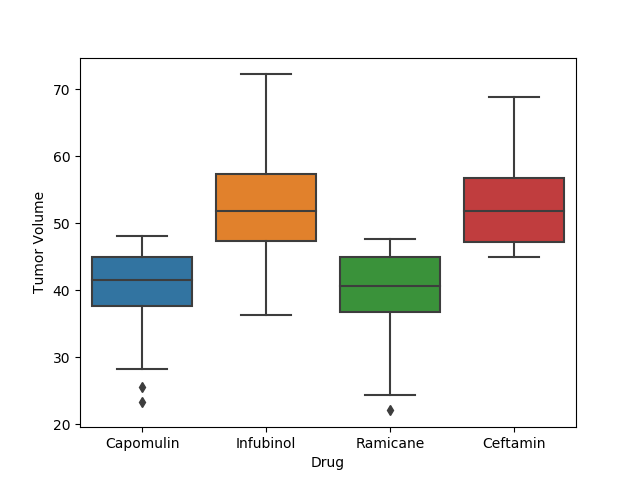

In [50]:
ax = sns.boxplot(x="Drug", y="Tumor Volume", data= topfour)
plt.savefig("../Images/boxplot.png")

In [17]:
# Determine if there are any potential outliers in the tumor volume
quartiles = merged_df["Tumor Volume"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumorval = merged_df.loc[(merged_df["Tumor Volume"] < lower_bound) | (merged_df["Tumor Volume"] > upper_bound)]

outlier_tumorval.to_csv("data/outlier_tumorval.csv")
outlier_tumorval

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.29220039
The interquartile range of tumor volume is: 11.292200389999998
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug,Sex,Age_months,Weight
40,h246,45,74.104086,2,Ketapril,Male,13,30
49,p189,40,74.106091,4,Ketapril,Male,8,28
50,p189,45,75.294936,4,Ketapril,Male,8,28
109,z969,45,73.867845,4,Naftisol,Male,9,30
154,l725,40,73.693494,3,Naftisol,Female,8,26
155,l725,45,76.668817,3,Naftisol,Female,8,26
180,a818,45,74.997764,2,Naftisol,Female,12,28
192,t724,45,75.113288,2,Naftisol,Female,2,25
202,k382,45,73.715619,4,Ketapril,Male,22,29
380,o331,45,78.567014,4,Ketapril,Male,24,30


## Line and scatter plots

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Calculate the average tumor volume groupby weight
columns = ["Mouse ID","Tumor Volume","Weight"]
scatter_df = merged_df.loc[:,["Mouse ID","Drug","Tumor Volume","Weight"]]
scatter_df=merged_df.loc[merged_df["Drug"] == "Capomulin", columns]
scatter_df=scatter_df.groupby("Mouse ID").mean()

scatter_df.to_csv("data/scatter_df.csv")
scatter_df.head()


,Tumor Volume,Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


<IPython.core.display.Javascript object>


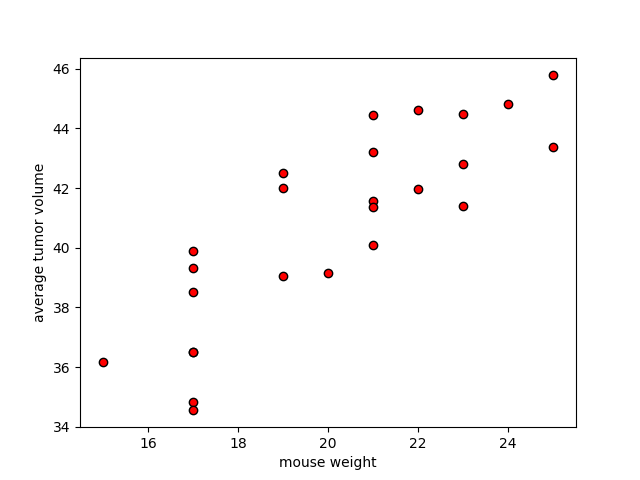

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
volume = scatter_df.iloc[:,0]
weight = scatter_df.iloc[:,1]
plt.scatter(weight,volume, marker="o", facecolors="red", edgecolors="black",alpha=1)

#Add the labels
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')

plt.show()
plt.savefig("../Images/capomulin_wgtnvol.png")

<IPython.core.display.Javascript object>


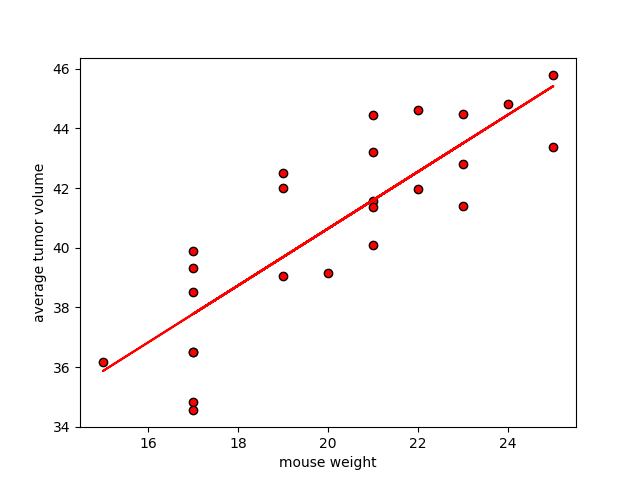

In [52]:
volume = scatter_df.iloc[:,0]
weight = scatter_df.iloc[:,1]
plt.scatter(weight,volume, marker="o", facecolors="red", edgecolors="black",alpha=1)
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume')

# Add the linear regression equation and line to plot
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,15),fontsize=10,color="red")

plt.savefig("../Images/wgtnvol_line.png")


In [53]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
